Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics

Data Collection and Analysis

In [3]:
insurance_df = pd.read_csv('/content/insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance_df.shape

(1338, 7)

In [5]:
insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
insurance_df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [11]:
insurance_df.isnull().sum()  #checking for any missing values in each column

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<ipython-input-14-cd67d6489482>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(insurance_df['age'])


Text(0.5, 1.0, 'Age Distribution')

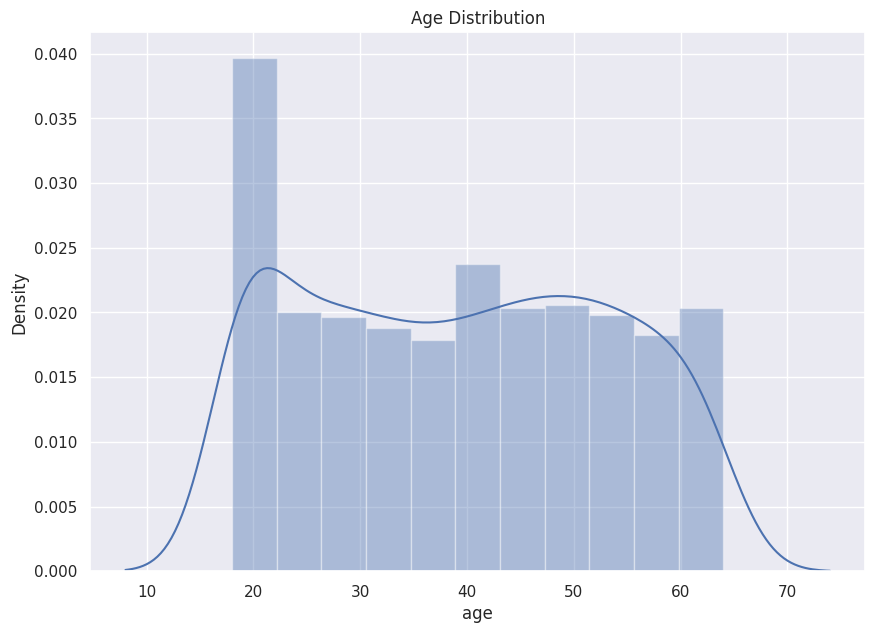

In [14]:
sb.set()  #used for better themed plots
plt.figure(figsize=(10,7))
sb.distplot(insurance_df['age'])
plt.title('Age Distribution')

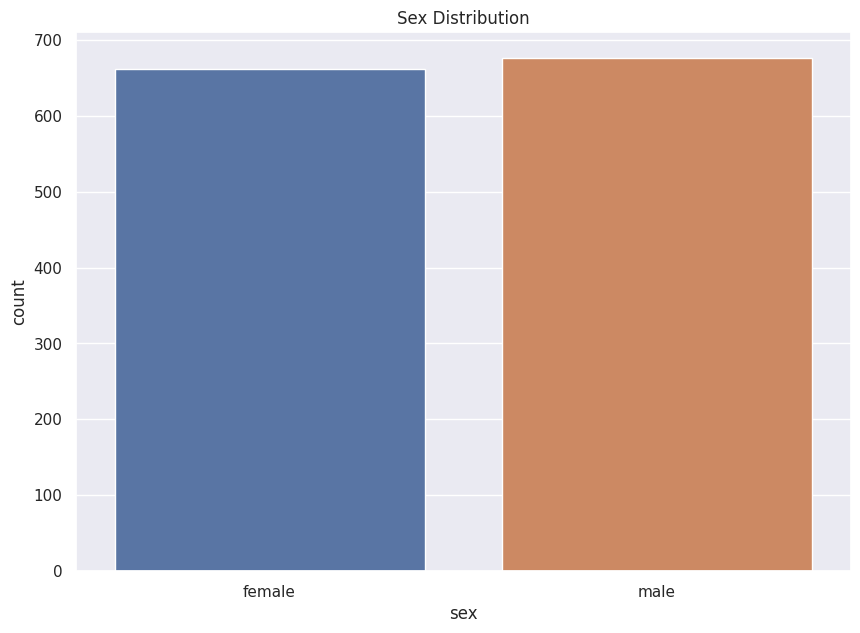

In [16]:
#Distribution of gender column using countplot
plt.figure(figsize=(10,7))
sb.countplot(x='sex',data=insurance_df)
plt.title('Sex Distribution')
plt.show()

<ipython-input-18-5154f9da7706>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(insurance_df['bmi'])


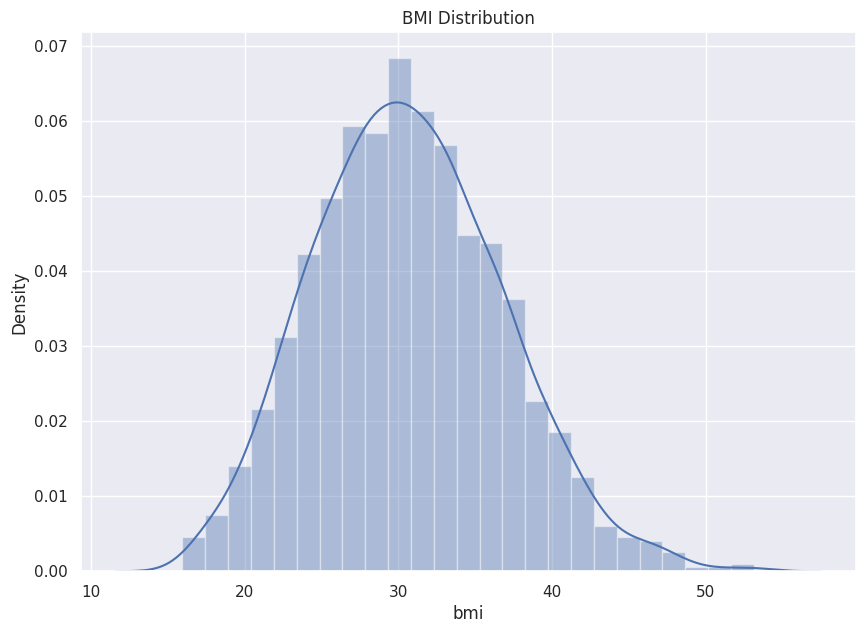

In [18]:
plt.figure(figsize=(10,7))
sb.distplot(insurance_df['bmi'])
plt.title('BMI Distribution')
import warnings
warnings.filterwarnings('ignore')

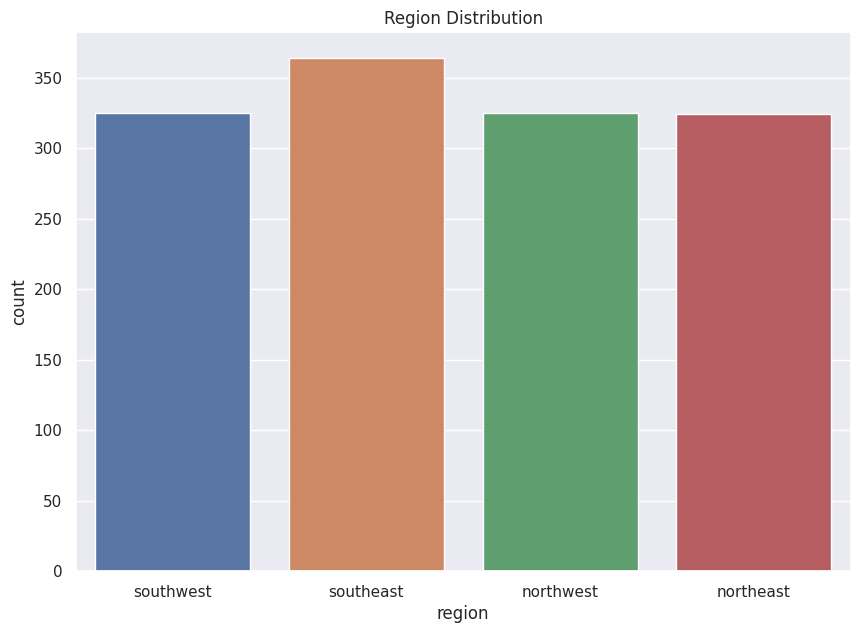

In [19]:
#Distribution of region
plt.figure(figsize=(10,7))
sb.countplot(x='region',data=insurance_df)
plt.title('Region Distribution')
plt.show()

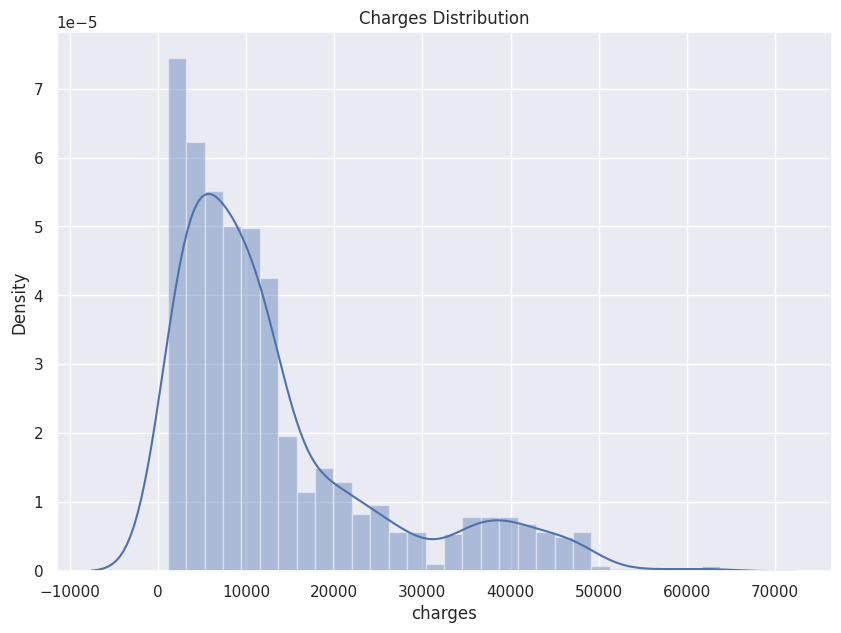

In [20]:
plt.figure(figsize=(10,7))
sb.distplot(insurance_df['charges'])
plt.title('Charges Distribution')
plt.show()

Data preprocessing

In [21]:
insurance_df.replace({'sex': {'male':1,'female':0}},inplace=True)  #will replace text data with the values we want
insurance_df.replace({'smoker': {'yes': 1,'no':0}},inplace=True)
insurance_df.replace({'region': {'southeast': 0,'southwest': 1,'northeast':2,'northwest': 3}},inplace=True)

In [22]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [23]:
X = insurance_df[['age','sex','bmi','children','smoker','region']]
y = insurance_df[['charges']]

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape,' ',X_test.shape)

(1070, 6)   (268, 6)


In [25]:
from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression()
lrmodel.fit(X_train,y_train)

LinearRegression()

Model Evaluation

In [26]:
training_prediction = lrmodel.predict(X_train)

In [27]:
# R - squared value
r2_train = metrics.r2_score(y_train,training_prediction)
print(r2_train)

0.7722534371602263


In [28]:
lrmodel.score(X_test,y_test)

0.6533679712481828

In [29]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor()
rfmodel.fit(X_train,y_train)

RandomForestRegressor()

In [30]:
rftraining_prediction = rfmodel.predict(X_train)
rf_train = metrics.r2_score(y_train,rftraining_prediction)
print(rf_train)

0.9813453857738226


In [31]:
rfmodel.score(X_test,y_test)

0.7441668637093817

In [37]:
from xgboost import XGBRegressor
xgmodel = XGBRegressor()
xgmodel.fit(X_train,y_train)
xgmodel.score(X_test,y_test)

0.6910181083897509

Building a Predictive System

In [38]:
input_data = (60,0,36.005,0,0,2)
input_data = np.array(input_data)

In [39]:
#reshaping the array
input_data_reshaped = input_data.reshape(1,-1)
prediction = lrmodel.predict(input_data_reshaped)
print("Predicted value: ",prediction)

Predicted value:  [[15113.08332525]]


In [42]:
prediction = rfmodel.predict(input_data_reshaped)
print("The insurance cost is : ",prediction[0])

The insurance cost is :  13899.73090379999


In [41]:
prediction = xgmodel.predict(input_data_reshaped)
print("Predicted value: ",prediction)

Predicted value:  [16949.695]
